In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, wilcoxon, anderson, chi2_contingency

df = pd.read_csv('da2.csv', encoding='latin1')



In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14332 entries, 0 to 14331
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        14332 non-null  int64  
 1   Disaster Subgroup           14332 non-null  object 
 2   Disaster Type               14332 non-null  object 
 3   Country                     14332 non-null  object 
 4   ISO                         14332 non-null  object 
 5   Continent                   14332 non-null  object 
 6   Location                    14332 non-null  object 
 7   Dis Mag Value               14332 non-null  float64
 8   Dis Mag Scale               14332 non-null  object 
 9   Latitude                    14332 non-null  float64
 10  Longitude                   14332 non-null  float64
 11  Start Date                  14332 non-null  object 
 12  End Date                    14332 non-null  object 
 13  Total Deaths                143

In [54]:
print(df.head())

   Year Disaster Subgroup        Disaster Type     Country  ISO Continent  \
0  1902       Geophysical           Earthquake   Guatemala  GTM  Americas   
1  1903       Geophysical  Mass movement (dry)      Canada  CAN  Americas   
2  1904    Meteorological                Storm  Bangladesh  BGD      Asia   
3  1905       Geophysical  Mass movement (dry)      Canada  CAN  Americas   
4  1905       Geophysical           Earthquake       India  IND      Asia   

                            Location  Dis Mag Value Dis Mag Scale   Latitude  \
0          Quezaltenango, San Marcos        8.00000       Richter  14.000000   
1                     Frank, Alberta    48480.11482           Km2  35.557594   
2                         Chittagong    48480.11482           Kph  35.557594   
3  Spence's Bridge, British Columbia    48480.11482           Km2  35.557594   
4                             Kangra        8.00000       Richter  32.040000   

   ...  Start Date    End Date Total Deaths  No Injured 

In [55]:
print(df.describe())

               Year  Dis Mag Value      Latitude     Longitude  Total Deaths  \
count  14332.000000   1.433200e+04  14332.000000  14332.000000  1.433200e+04   
mean    1998.649177   4.848011e+04     35.557594     72.011227  2.048471e+03   
std       19.050440   1.812838e+05    302.549834    471.120748  4.279844e+04   
min     1900.000000  -5.700000e+01   -913.908000   -955.370000  1.000000e+00   
25%     1992.000000   1.213825e+04     35.557594     72.011227  1.000000e+01   
50%     2003.000000   4.848011e+04     35.557594     72.011227  4.300000e+01   
75%     2011.000000   4.848011e+04     35.557594     72.011227  2.732000e+03   
max     2021.000000   1.302587e+07  36100.000000  52700.000000  3.000000e+06   

         No Injured   No Affected   No Homeless  Total Affected  \
count  1.433200e+04  1.433200e+04  1.433200e+04    1.433200e+04   
mean   2.624653e+03  9.075273e+05  7.551505e+04    7.353792e+05   
std    1.790724e+04  6.852987e+06  2.144701e+05    6.924854e+06   
min    1.00

In [56]:
print(df.describe(include=['O']))

       Disaster Subgroup Disaster Type                         Country    ISO  \
count              14332         14332                           14332  14332   
unique                 6            15                             221    221   
top         Hydrological         Flood  United States of America (the)    USA   
freq                5970          5257                             988    988   

       Continent Location Dis Mag Scale  Start Date    End Date  
count      14332    14332         14332       14332       14332  
unique         5    12786             5        8348        8302  
top         Asia    North           Km2  30-06-2000  30-11-2000  
freq        5864       45          7338          27          35  


In [57]:
print(df.isnull().sum())

Year                          0
Disaster Subgroup             0
Disaster Type                 0
Country                       0
ISO                           0
Continent                     0
Location                      0
Dis Mag Value                 0
Dis Mag Scale                 0
Latitude                      0
Longitude                     0
Start Date                    0
End Date                      0
Total Deaths                  0
No Injured                    0
No Affected                   0
No Homeless                   0
Total Affected                0
Insured Damages ('000 US$)    0
Total Damages ('000 US$)      0
CPI                           0
dtype: int64


In [52]:
# --- Kruskal-Wallis Test: Total Deaths by Disaster Type ---
result = kruskal(df[df['Disaster Type'] == 'Flood']['Total Deaths'],
                 df[df['Disaster Type'] == 'Storm']['Total Deaths'],
                 df[df['Disaster Type'] == 'Earthquake']['Total Deaths'])

print(f"Kruskal-Wallis Test Statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

Kruskal-Wallis Test Statistic: 30.21542850622982
P-value: 2.7466483810417814e-07


<ipython-input-2-dbf696bfddeb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disaster Type', y='Total Deaths', data=df, palette="Set2", width=0.6)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

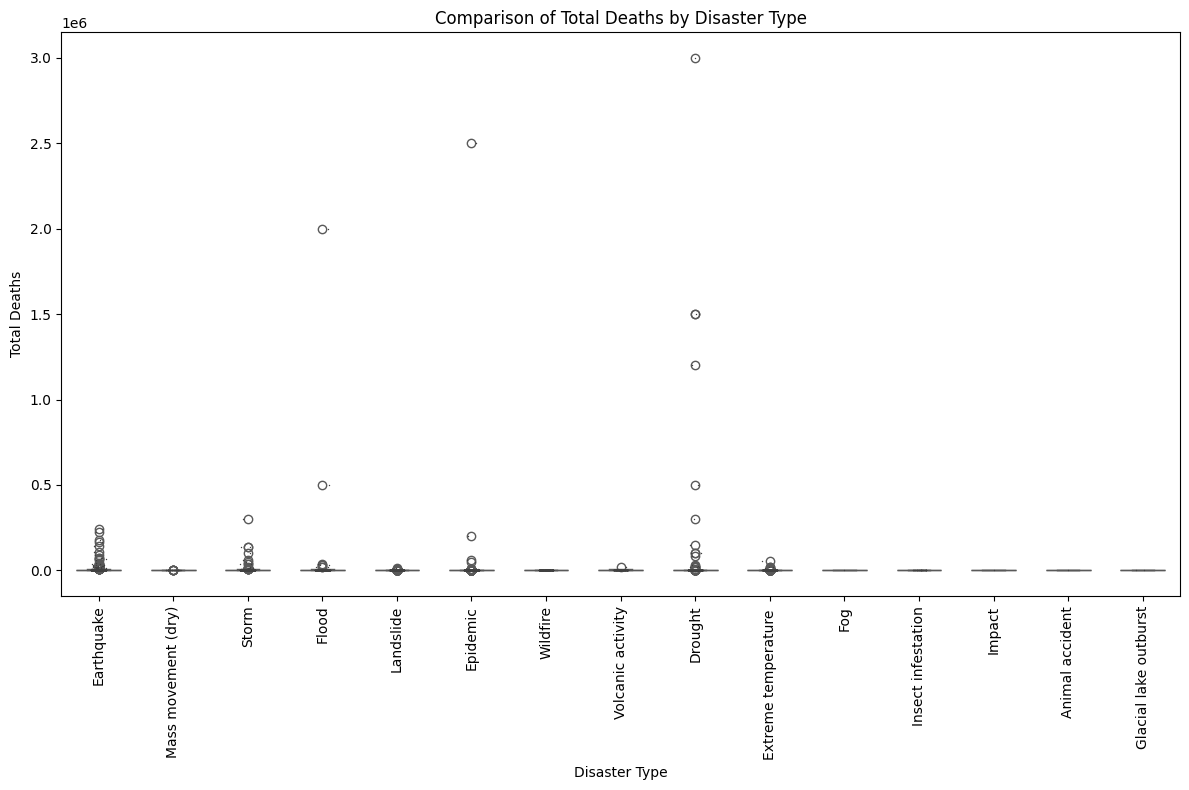

In [2]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Disaster Type', y='Total Deaths', data=df, palette="Set2", width=0.6)
sns.stripplot(x='Disaster Type', y='Total Deaths', data=df, color=".25", size=1)
plt.title('Comparison of Total Deaths by Disaster Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [3]:
# --- Wilcoxon Signed-Rank Test: Homeless People in Asia vs Europe ---
asia_homeless = df[df['Continent'] == 'Asia']['No Homeless'].dropna()
europe_homeless = df[df['Continent'] == 'Europe']['No Homeless'].dropna()

In [4]:
min_length = min(len(asia_homeless), len(europe_homeless))
asia_homeless = asia_homeless[:min_length]
europe_homeless = europe_homeless[:min_length]

In [5]:
#  Wilcoxon Signed-Rank Test
statistic, p_value = wilcoxon(asia_homeless, europe_homeless, alternative='two-sided')
print(f"Wilcoxon Signed-Rank Test Statistic: {statistic}")
print(f"P-value: {p_value}")


Wilcoxon Signed-Rank Test Statistic: 51517.0
P-value: 0.109850931057235


In [6]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Significant difference in number of homeless people between Asia and Europe.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Fail to reject the null hypothesis. No significant difference.


In [22]:
df.rename(columns={'Total Damages (\'000 US$)': 'Total Damages (000 US$)'}, inplace=True)
df.rename(columns={'Insured Damages (\'000 US$)': 'Insured Damages (000 US$)'}, inplace=True)



In [23]:
# --- Kruskal-Wallis Test: Total Damages by Continent ---
analysis_data = df[['Continent', 'Total Damages (000 US$)', 'Total Deaths']].dropna()

result_damages = kruskal(*[group['Total Damages (000 US$)'] for name, group in analysis_data.groupby('Continent')])
print(f"Kruskal-Wallis Test Statistic for Total Damages: {result_damages.statistic}")
print(f"P-value for Total Damages: {result_damages.pvalue}")

Kruskal-Wallis Test Statistic for Total Damages: 262.95360189153206
P-value for Total Damages: 1.0531510938571368e-55


In [24]:
result_deaths = kruskal(*[group['Total Deaths'] for name, group in analysis_data.groupby('Continent')])
print(f"Kruskal-Wallis Test Statistic for Total Deaths: {result_deaths.statistic}")
print(f"P-value for Total Deaths: {result_deaths.pvalue}")


Kruskal-Wallis Test Statistic for Total Deaths: 53.84759521360615
P-value for Total Deaths: 5.663928327179605e-11


<ipython-input-25-6b1277602f91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Continent', y='Total Damages (000 US$)', data=analysis_data, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a lengt

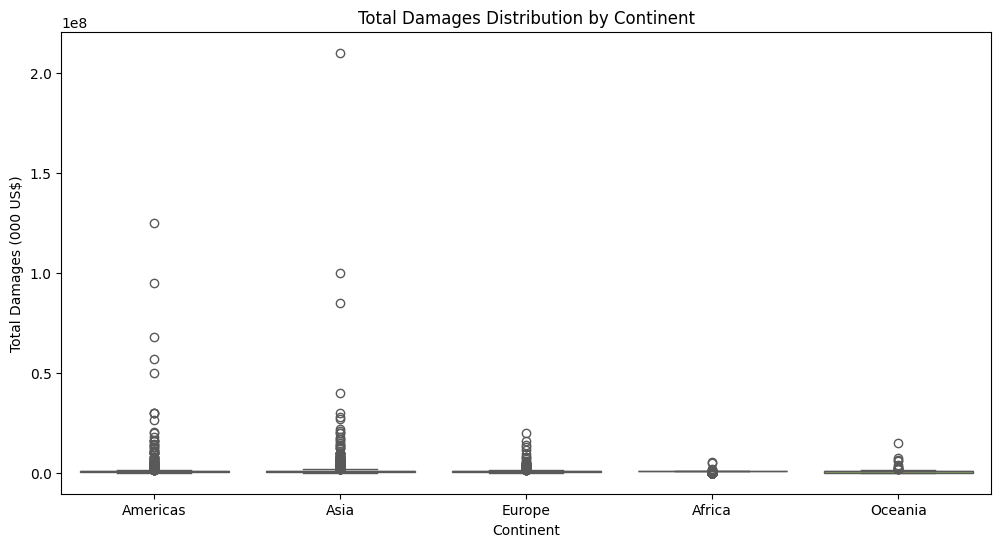

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y='Total Damages (000 US$)', data=analysis_data, palette='Set2')
plt.title('Total Damages Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Damages (000 US$)')
plt.show()

<ipython-input-26-1b6552f6ca70>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Continent', y='Total Deaths', data=analysis_data, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple t

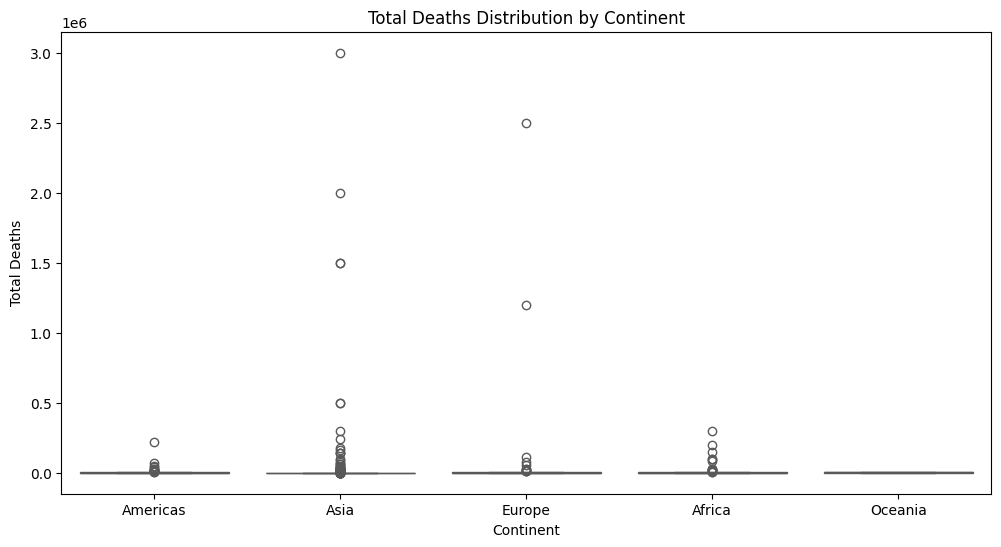

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y='Total Deaths', data=analysis_data, palette='Set2')
plt.title('Total Deaths Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.show()

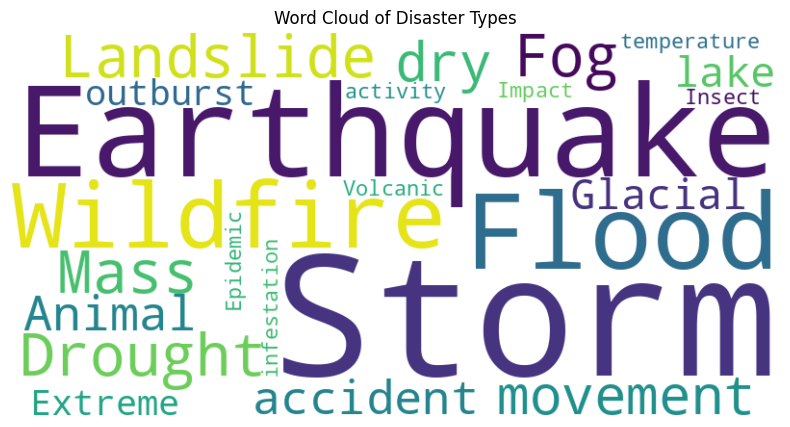

In [27]:
from wordcloud import WordCloud

disaster_type_counts = df['Disaster Type'].value_counts()
text = ' '.join(set(df['Disaster Type'].dropna()))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disaster Types')
plt.show()

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

disaster_type_counts = df['Disaster Type'].value_counts()

observed = pd.DataFrame(disaster_type_counts).T

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

# Output the results
print(f"Chi-square Test Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")


Chi-square Test Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies: [[5.257e+03 3.781e+03 1.504e+03 1.198e+03 7.130e+02 6.110e+02 5.110e+02
  4.240e+02 2.230e+02 6.000e+01 4.500e+01 2.000e+00 1.000e+00 1.000e+00
  1.000e+00]]


In [29]:
# --- Anderson-Darling Test for Normality: Total Deaths ---
numerical_column = 'Total Deaths'
numerical_data = df[numerical_column]
result = anderson(numerical_data)

if result.statistic < result.critical_values[2]:
    print(f"{numerical_column} appears to be normally distributed.")
else:
    print(f"{numerical_column} does not appear to be normally distributed.")

Total Deaths does not appear to be normally distributed.


In [30]:
# --- Financial Impact by Country ---
financial_data = df[['Country', 'Total Damages (000 US$)', 'Insured Damages (000 US$)']].dropna()
total_impact_by_country = financial_data.groupby('Country')[['Total Damages (000 US$)', 'Insured Damages (000 US$)']].sum()

high_impact_countries = total_impact_by_country[
    (total_impact_by_country['Total Damages (000 US$)'] > total_impact_by_country['Total Damages (000 US$)'].mean()) &
    (total_impact_by_country['Insured Damages (000 US$)'] > total_impact_by_country['Insured Damages (000 US$)'].mean())
]


<ipython-input-31-fb9176584e64>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_impact_countries.index, y='Total Damages (000 US$)', data=high_impact_countries, palette='viridis', label='Total Damages')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/

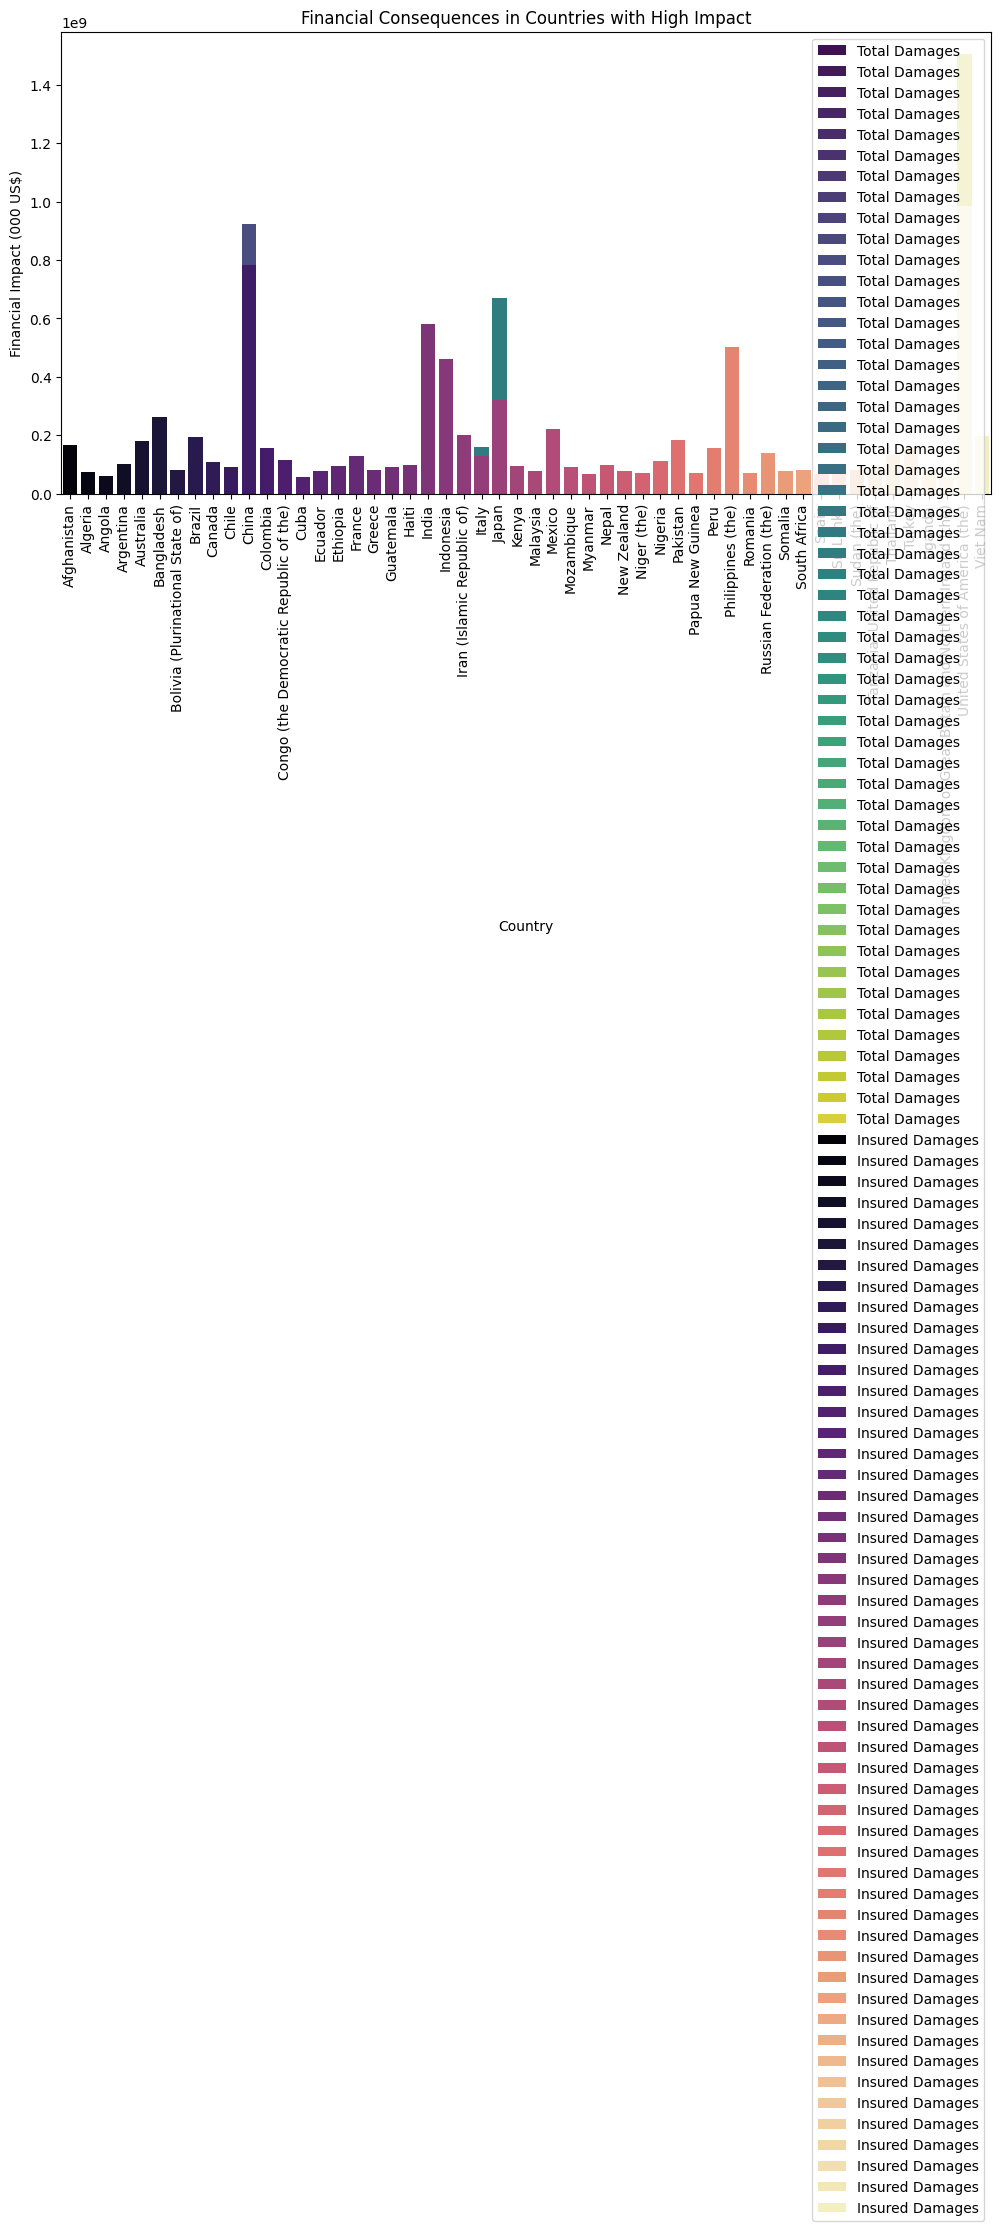

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x=high_impact_countries.index, y='Total Damages (000 US$)', data=high_impact_countries, palette='viridis', label='Total Damages')
sns.barplot(x=high_impact_countries.index, y='Insured Damages (000 US$)', data=high_impact_countries, palette='magma', label='Insured Damages')
plt.title('Financial Consequences in Countries with High Impact')
plt.xlabel('Country')
plt.ylabel('Financial Impact (000 US$)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [34]:
# --- Kruskal-Wallis Test: Total Deaths by Disaster Type ---
data_for_analysis = df[['Disaster Type', 'Total Deaths']].dropna()

# Perform the Kruskal-Wallis test
result = kruskal(*[group['Total Deaths'] for name, group in data_for_analysis.groupby('Disaster Type')])

print(f"Kruskal-Wallis Test Statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. Significant difference in average number of deaths across different disaster types.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")


Kruskal-Wallis Test Statistic: 1167.5006918085335
P-value: 1.6786321289708755e-240
Reject the null hypothesis. Significant difference in average number of deaths across different disaster types.


<ipython-input-35-dacc01d3f326>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disaster Type', y='Total Deaths', data=data_for_analysis, palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1

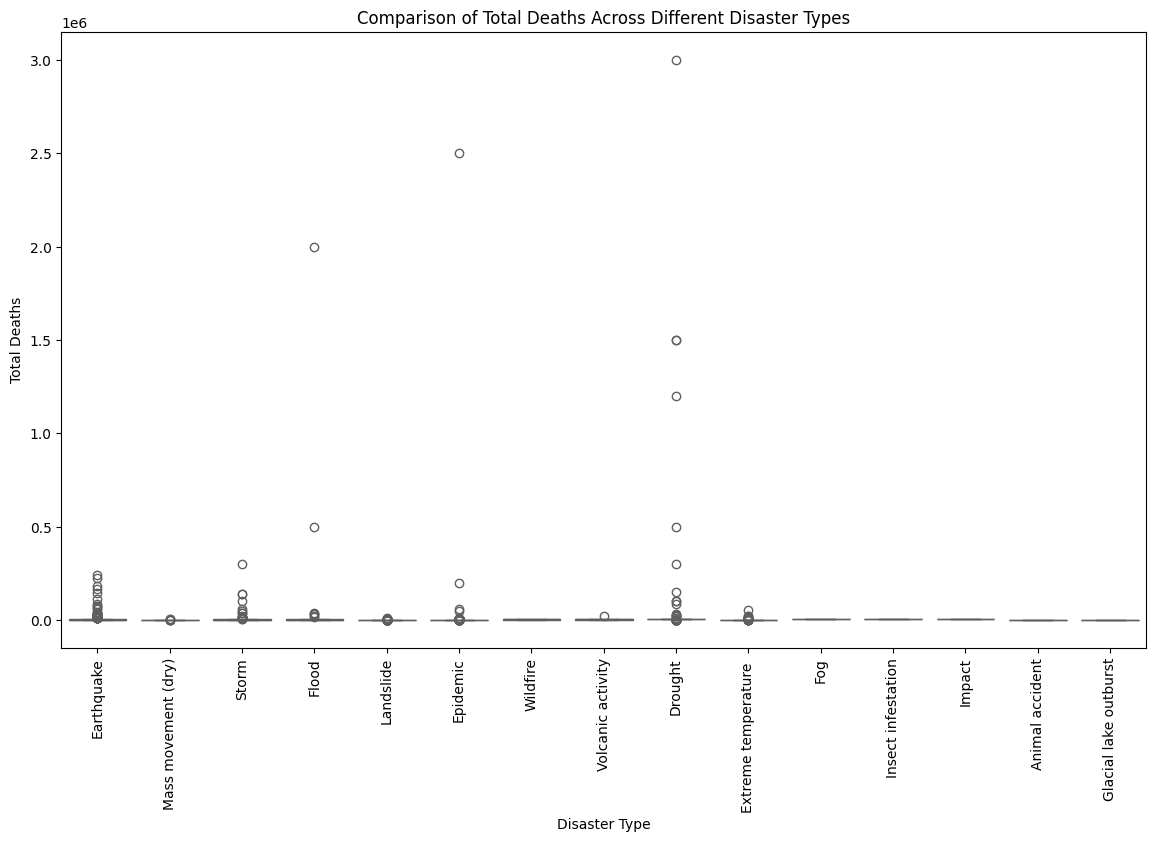

In [35]:
# Visualization - Box plot for Total Deaths across Disaster Types
plt.figure(figsize=(14, 8))
sns.boxplot(x='Disaster Type', y='Total Deaths', data=data_for_analysis, palette='Set3')
plt.title('Comparison of Total Deaths Across Different Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Total Deaths')
plt.xticks(rotation=90)
plt.show()

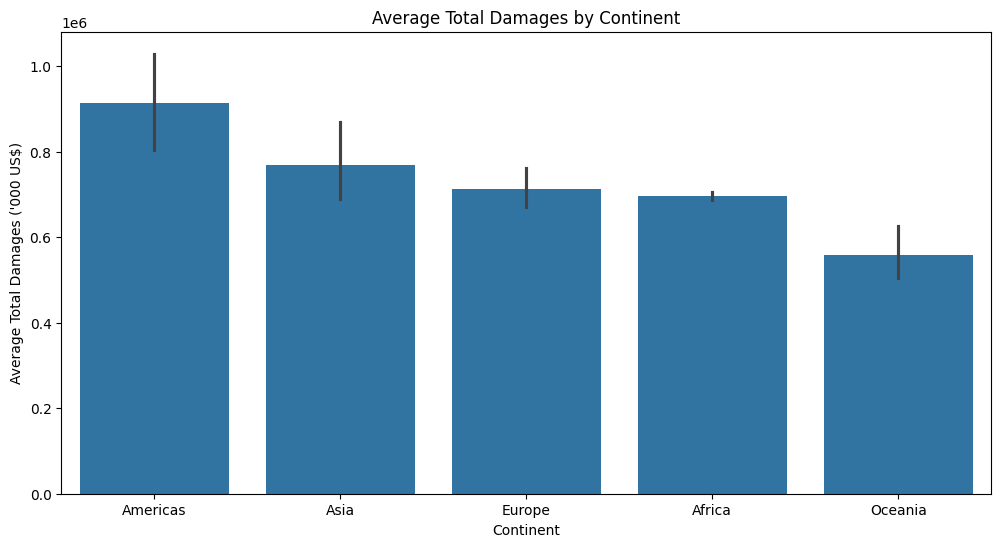

In [37]:
# --- Bar Plot: Average Total Damages by Continent ---
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='Total Damages (000 US$)', data=df)
plt.title('Average Total Damages by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Total Damages (\'000 US$)')
plt.show()

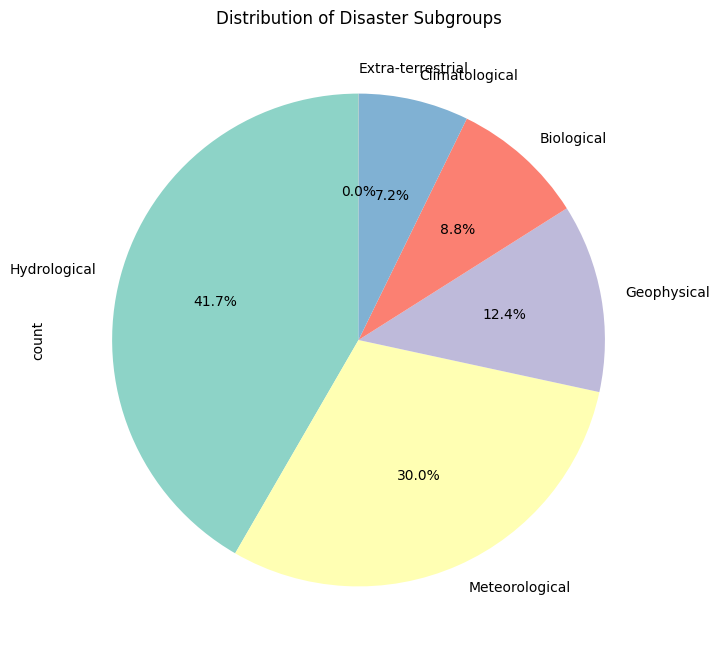

In [38]:
# --- Pie Chart: Distribution of Disaster Subgroups ---
plt.figure(figsize=(8, 8))
df['Disaster Subgroup'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Distribution of Disaster Subgroups')
plt.show()

In [40]:
# --- Wilcoxon Signed-Rank Test: Total Deaths in Tsunamis vs Floods ---
tsunami_deaths = df[df['Disaster Type'] == 'Tsunami/Tidal wave']['Total Deaths'].dropna()
flood_deaths = df[df['Disaster Type'] == 'Flood']['Total Deaths'].dropna()



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


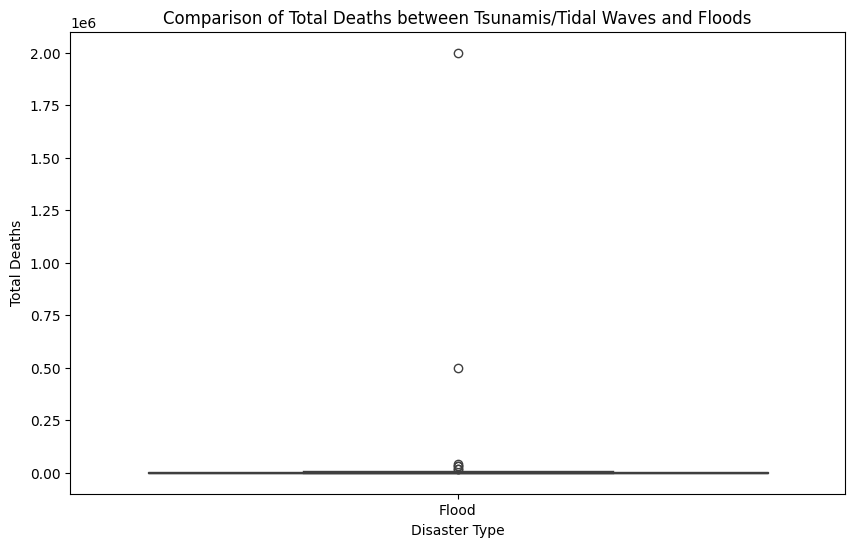

In [43]:
# Visualization - Box plot for Total Deaths in Tsunamis vs Floods
plt.figure(figsize=(10, 6))
sns.boxplot(x='Disaster Type', y='Total Deaths', data=df[df['Disaster Type'].isin(['Tsunami/Tidal wave', 'Flood'])])
plt.title('Comparison of Total Deaths between Tsunamis/Tidal Waves and Floods')
plt.xlabel('Disaster Type')
plt.ylabel('Total Deaths')
plt.show()

In [49]:
# --- Kruskal-Wallis Test for Insured Damages by Disaster Type ---
df.rename(columns={"Insured Damages (000 US$)": "Insured Damages"}, inplace=True)

# Performing the Kruskal-Wallis Test
result = kruskal(*[group['Insured Damages'] for name, group in df.groupby('Disaster Type')])
print(f"Kruskal-Wallis Test Statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

Kruskal-Wallis Test Statistic: 265.00852362682025
P-value: 2.2394500183803858e-48


<ipython-input-50-b9333a8d30fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disaster Type', y='Insured Damages', data=df, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

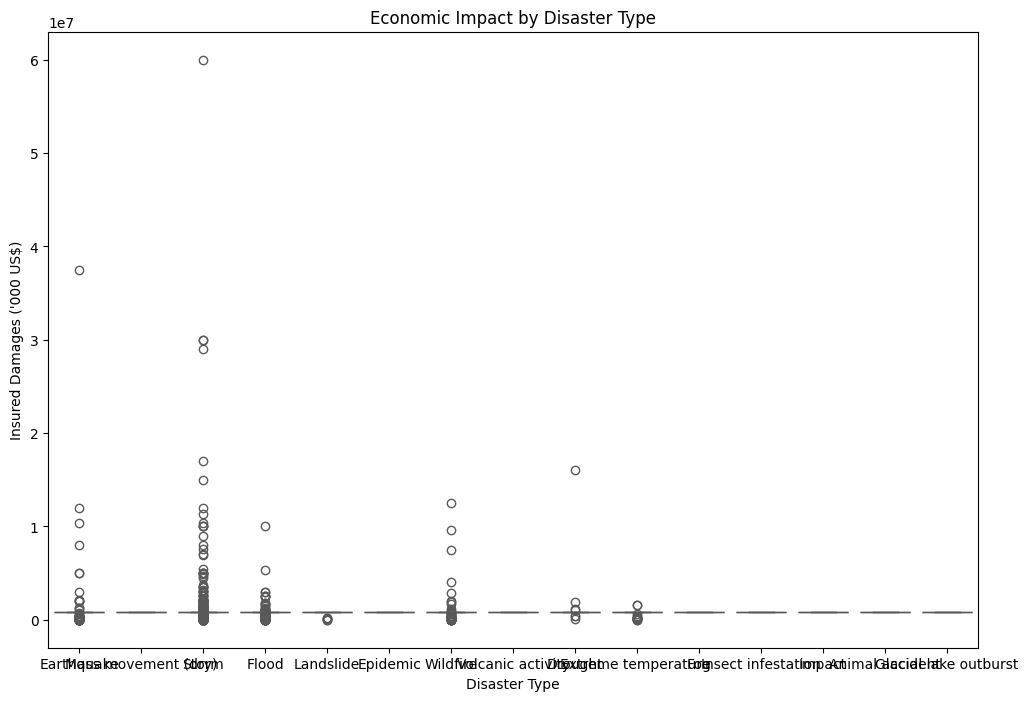

In [50]:
# Visualization - Box plot for Insured Damages by Disaster Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Disaster Type', y='Insured Damages', data=df, palette='Set2')
plt.title('Economic Impact by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Insured Damages (\'000 US$)')
plt.show()

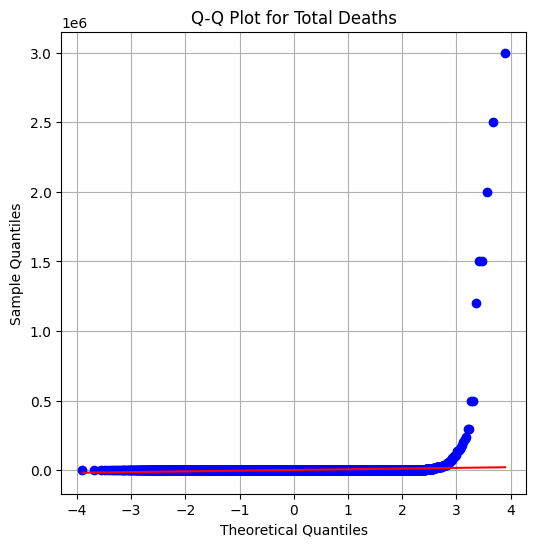

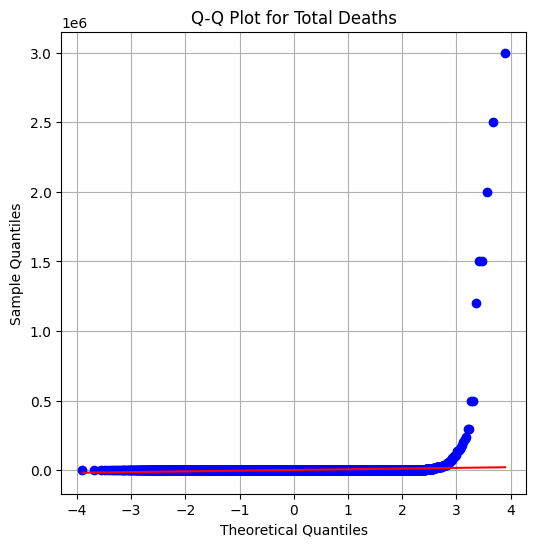

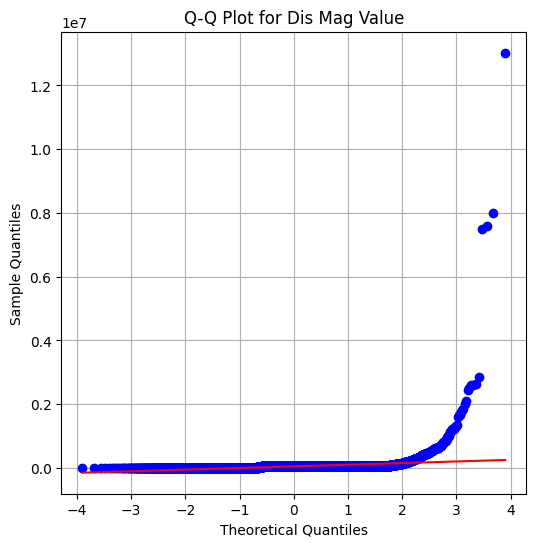

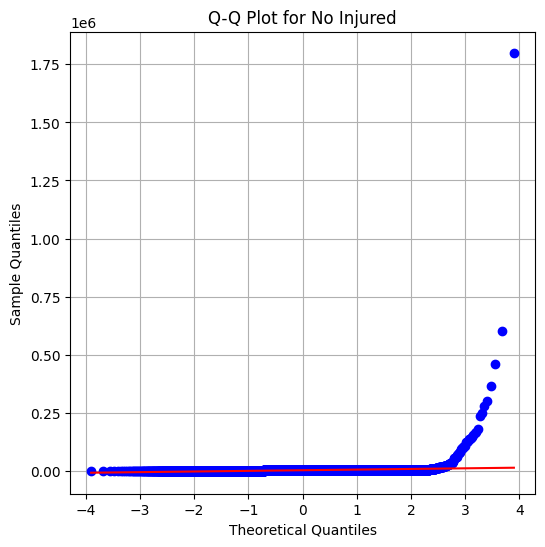

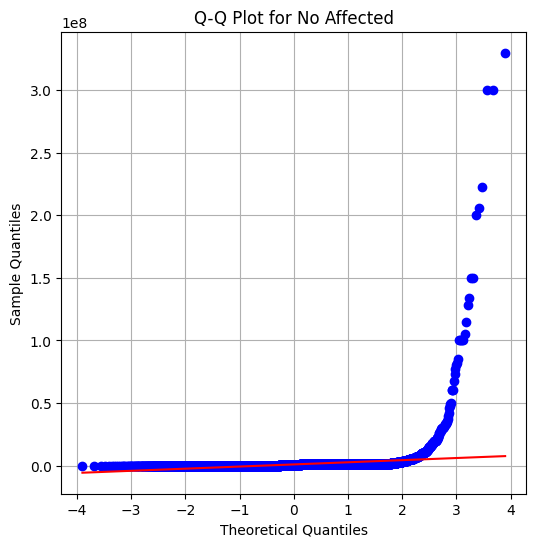

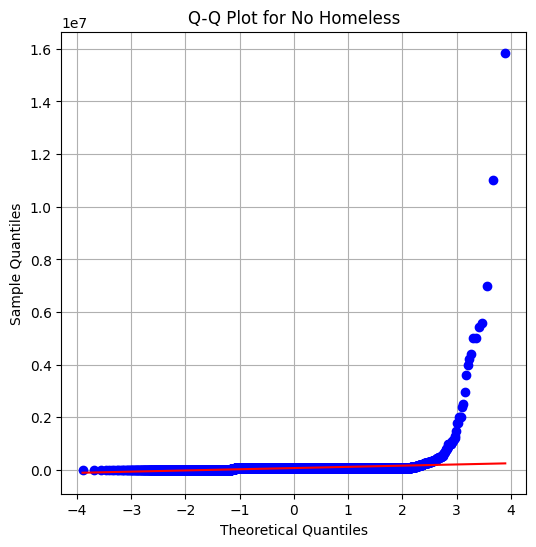

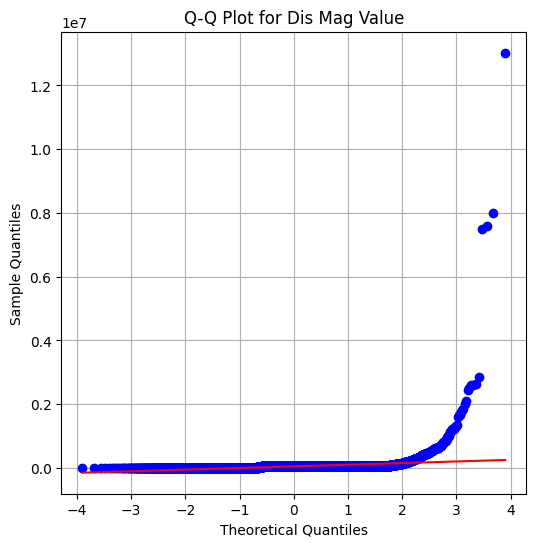

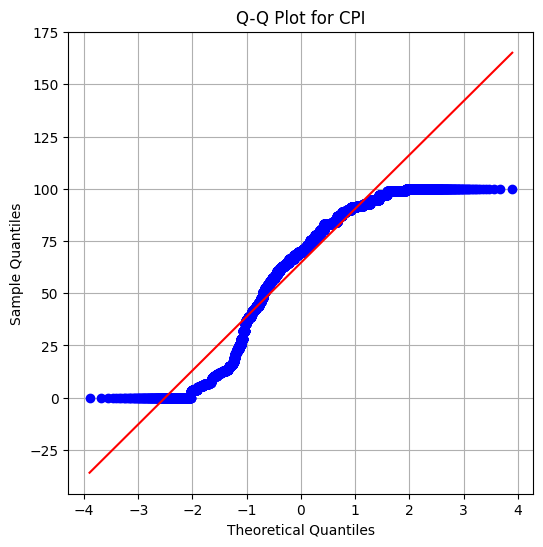

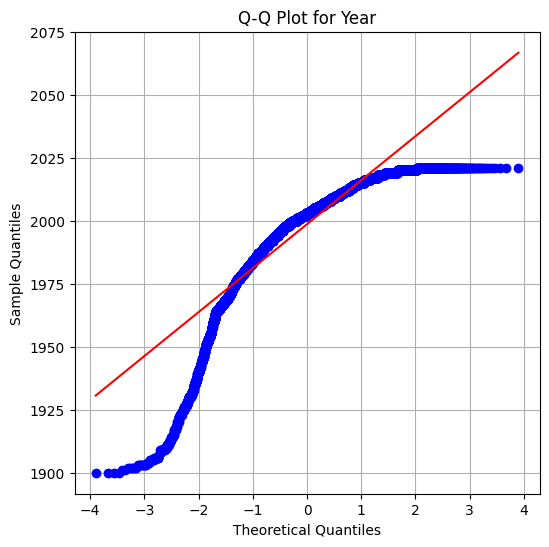

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

columns_to_analyze = [
    'Total Deaths',
    'Total Deaths',
    'Dis Mag Value',
    'No Injured',
    'No Affected',
    'No Homeless',
    'Dis Mag Value',
    'CPI',
    'Year'
]

def qq_plots(df, columns):
    for column in columns:

        data = df[column].dropna()


        plt.figure(figsize=(6, 6))
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(f"Q-Q Plot for {column}")
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel("Sample Quantiles")
        plt.grid(True)
        plt.show()

qq_plots(df, columns_to_analyze)
